# Linear Discriminant Analysis (LDA) — From Scratch

In this notebook, we implement LDA using NumPy only.

We will:

- Generate a dataset  
- Visualize it  
- Implement LDA step-by-step  
- Evaluate the model  
- Plot the decision boundary  

LDA is a linear classifier that projects data onto a line that best separates classes.

## What is Linear Discriminant Analysis (LDA)?

Linear Discriminant Analysis (LDA) is a **supervised linear classification algorithm** that finds a projection direction that best separates two (or more) classes.

LDA projects data onto a line:

$$
z = w^T x
$$

Where:

- $w$ — projection direction  
- $z$ — projected value  

The goal of LDA is to **maximize separation between class means** while **minimizing within-class variance**.

### Fisher Criterion

LDA maximizes the following objective:

$$
J(w) = \frac{(m_1 - m_0)^2}{s_1^2 + s_0^2}
$$

Where:

- $m_0, m_1$ — projected class means  
- $s_0^2, s_1^2$ — within-class variances  

### LDA Classification Steps

1. Project samples:  
   $$
   z = w^T x
   $$
2. Compute a threshold between class means  
3. Predict based on which side of the threshold $z$ falls  

LDA produces a **straight-line decision boundary** in 2D.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
np.random.seed(42)

## 1. Create a Synthetic Dataset

In [3]:
def make_blobs(centers, n_samples=100, std=1.2):
    X, y = [], []
    for idx, center in enumerate(centers):
        pts = np.random.randn(n_samples, 2) * std + center
        X.append(pts)
        y += [idx] * n_samples
    return np.vstack(X), np.array(y)

centers = [(-3, -2), (3, 3)]
X, y = make_blobs(centers)

## 2. Visualize the Dataset

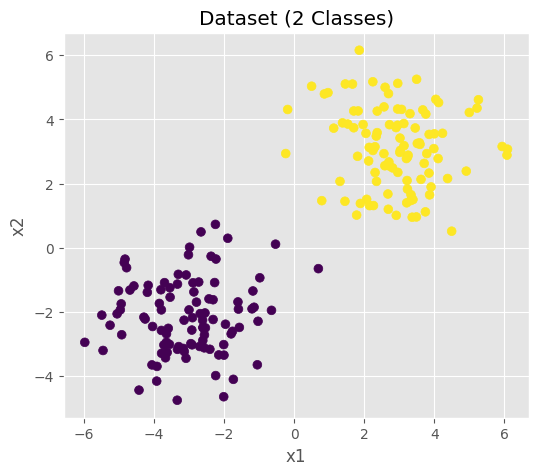

In [4]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y, s=40)
plt.title("Dataset (2 Classes)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## 3. Train/Test Split

In [5]:
perm = np.random.permutation(len(X))
split = int(0.75 * len(X))

train_idx = perm[:split]
test_idx = perm[split:]

X_train, y_train = X[train_idx], y[train_idx]
X_test, y_test = X[test_idx], y[test_idx]


## 4. Implement LDA

In [6]:
def compute_means(X, y):
    return {cls: X[y == cls].mean(axis=0) for cls in np.unique(y)}

def compute_within_class_scatter(X, y, means):
    Sw = np.zeros((X.shape[1], X.shape[1]))
    for cls in np.unique(y):
        Xc = X[y == cls] - means[cls]
        Sw += Xc.T @ Xc
    return Sw

def lda_train(X, y):
    means = compute_means(X, y)
    Sw = compute_within_class_scatter(X, y, means)
    
    mean_diff = means[1] - means[0]
    w = np.linalg.inv(Sw).dot(mean_diff)

    proj = X.dot(w)
    t0 = proj[y == 0].mean()
    t1 = proj[y == 1].mean()
    threshold = 0.5 * (t0 + t1)

    return w, threshold

def lda_predict(X, w, threshold):
    return (X.dot(w) > threshold).astype(int)


## 5. Train the Model and Evaluate Accuracy

In [7]:
w, threshold = lda_train(X_train, y_train)
y_pred = lda_predict(X_test, w, threshold)

accuracy = np.mean(y_pred == y_test)
print(f"LDA Accuracy: {accuracy:.3f}")


LDA Accuracy: 1.000


## 6. Visualize the Decision Boundary

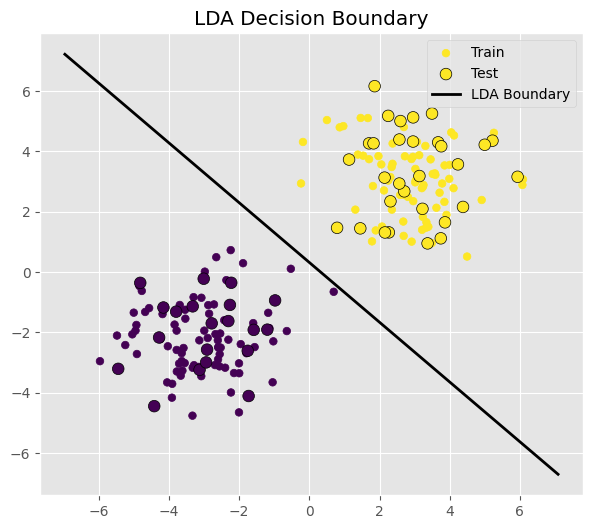

In [8]:
xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200)
yy = (threshold - w[0]*xx) / w[1]

plt.figure(figsize=(7,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=30, label="Train")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=70, edgecolors="k", label="Test")
plt.plot(xx, yy, color="black", linewidth=2, label="LDA Boundary")
plt.title("LDA Decision Boundary")
plt.legend()
plt.show()